# People Charm Case

In [1]:
#Loading the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
peopleCharmCase = pd.read_csv('People Charm case.csv')
peopleCharmCase.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
peopleCharmCase.shape

(14999, 10)

In [4]:
peopleCharmCase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Exploratory Data Analysis (EDA)

In [5]:
numeric_var_names=[key for key in dict(peopleCharmCase.dtypes) if dict(peopleCharmCase.dtypes)[key] in ['float64', 'int64']]
cat_var_names=[key for key in dict(peopleCharmCase.dtypes) if dict(peopleCharmCase.dtypes)[key] in ['object']]

### Univariate Analysis

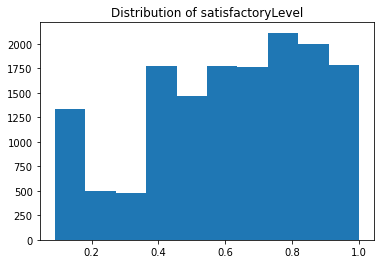

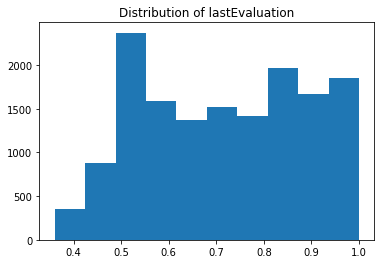

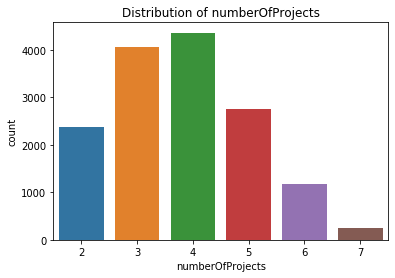

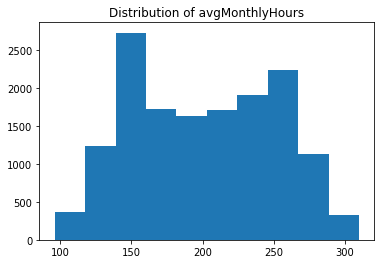

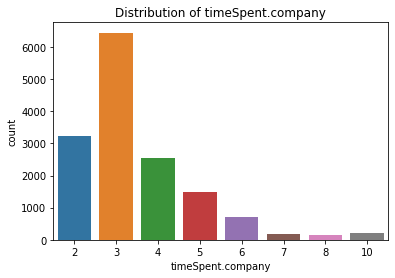

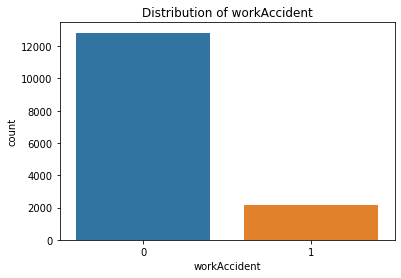

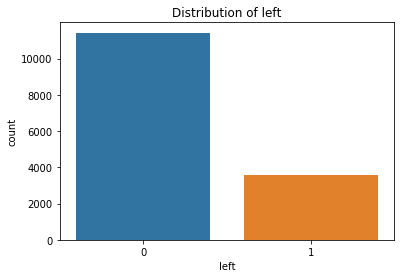

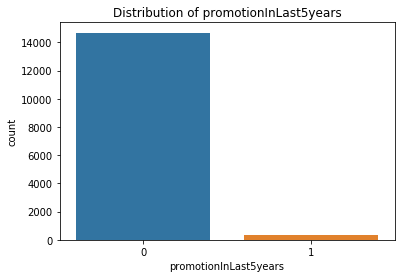

In [6]:
for num_variable in numeric_var_names:
    if (num_variable=='satisfactoryLevel') or (num_variable=='lastEvaluation') or (num_variable=='avgMonthlyHours'):
        plt.hist(peopleCharmCase[num_variable])
    else:
        sns.countplot(peopleCharmCase[num_variable])
    plt.title(str('Distribution of ') + str(num_variable))
    plt.show()

#### Note:
- Employees mostly spend 3 yrs in this company before leaving the company.
- There has not been many work accidents in the company which is a good thing.
- We can see that promotion over the last 5 years are very less.
- The target variable ('left') is not balanced between its classes (0 and 1).

### Bivariate Analysis

#### Correlation analysis

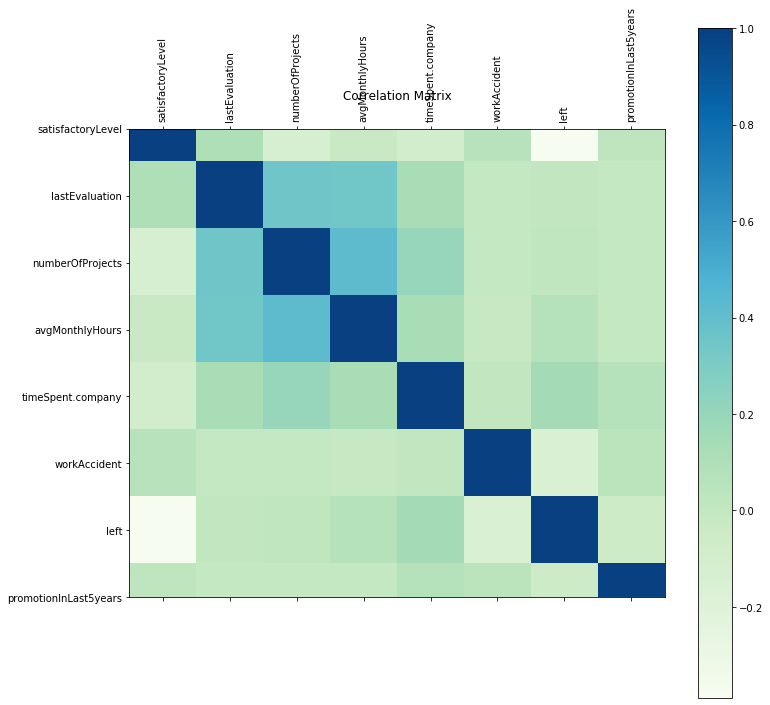

In [7]:
plt.rcParams['figure.figsize'] = [10,12]
matrix = peopleCharmCase.corr()
plt.matshow(matrix,cmap='GnBu')
plt.xticks(range(len(matrix.columns)),matrix.columns)
plt.yticks(range(len(matrix.columns)),matrix.columns)
plt.xticks(rotation=90)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

#### NOTE:
- We can't see much correlation among the attributes. Hence we will not drop any column.

## Boxplot for finding Outliers

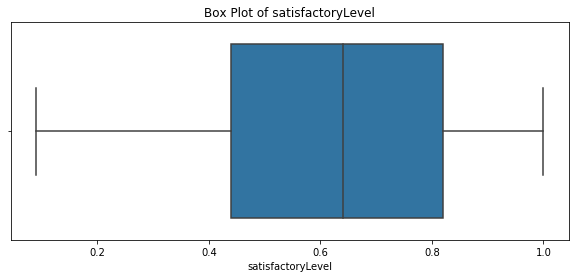

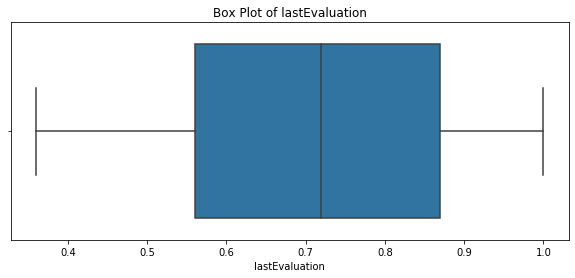

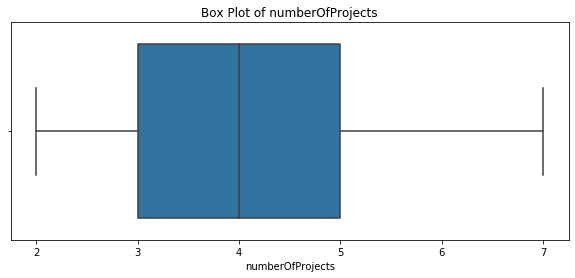

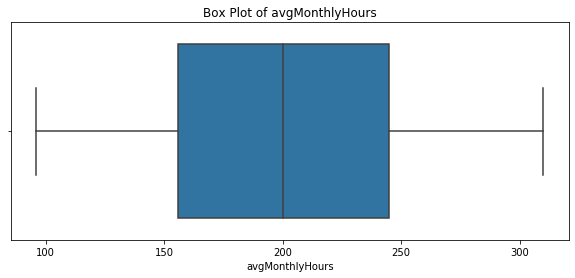

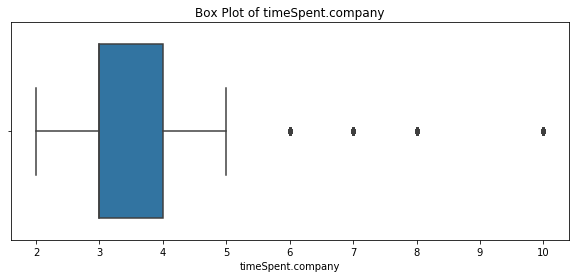

In [8]:
for num_variable in numeric_var_names:
    if (num_variable!='workAccident') and (num_variable!='left') and (num_variable!='promotionInLast5years'):
        fig,axes = plt.subplots(figsize=(10,4))
        sns.boxplot( x=num_variable, data = peopleCharmCase)
        plt.title(str('Box Plot of ') + str(num_variable))

#### Note:
- 'timeSpend@company' attribute had some outliers. No need to treat this as every employee will have his/her own time spent in the company. Treating this will manipulate the data in a wrong manner.
- The other attributes do not have any outliers.

## Handling missing value

In [9]:
peopleCharmCase.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

#### NOTE :
- There are no missing values in this dataset.

## Encoding

In [10]:
peopleCharmCase[['salary','dept']].nunique()

salary     3
dept      10
dtype: int64

In [11]:
print(peopleCharmCase['dept'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'IT' 'product_mng'
 'marketing' 'management' 'RandD']


In [12]:
print(peopleCharmCase['salary'].unique())

['low' 'medium' 'high']


#### Note:
- There are 3 types of Salaries
    - low, medium, high
- There are 10 types of Departments
    - sales, accounting, hr, technical, support, IT, product_mng, marketing, management, RandD

We can use encoding on 'dept', 'Salary' attributes.

In [13]:
Y = peopleCharmCase['left']
X = peopleCharmCase.drop(['left'],axis=1)

In [14]:
X = pd.get_dummies(X)
X.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [15]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

## Normalize the data

I tested the data using Standard Scaler, Min-Max Scaler and Robust Scaler. All the techniques gave the same accuracy. So I will be using Min-Max Scaler here.

In [16]:
mmsc = MinMaxScaler()
mmsc_data = mmsc.fit_transform(X)
mmsc_data = pd.DataFrame(mmsc_data)
mmsc_data.columns = X.columns
X=mmsc_data
X.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.351648,0.218750,0.0,0.266355,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Train - Test splitting

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

## Classification Algorithms

In [18]:
def accuracy_func(y_test,y_pred):
    print('\033[1m'+"Accuracy =",metrics.accuracy_score(y_test,y_pred)*100)

In [19]:
def conf_mat(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print('\033[1m'+'Confusion Matrix is :',cm,sep='\n')

In [20]:
def plot_ROC(y_test,y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
    roc_auc = metrics.auc(fpr,tpr)
    print('\033[1m'+'Area under the curve :',roc_auc)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr,tpr,'red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],color = 'black',linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# 1) KNN

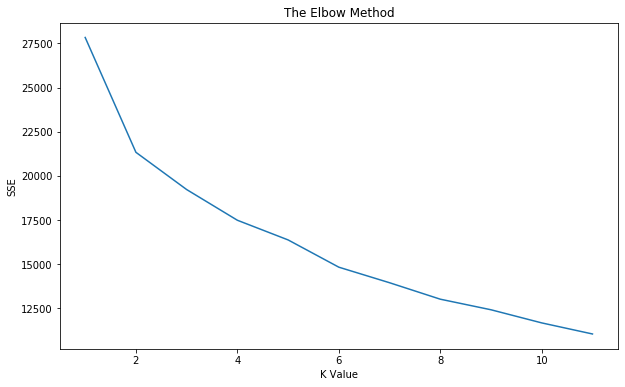

In [21]:
# Using the elbow method to find the optimal K value

ls = []
for i in range(1,12):
    km = KMeans(n_clusters=i)
    km.fit(X)
    ls.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(range(1,12),ls)
plt.title('The Elbow Method')
plt.xlabel('K Value')
plt.ylabel('SSE')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [23]:
accuracy_func(y_test,y_pred)

Accuracy = 94.97777777777779


In [24]:
conf_mat(y_test,y_pred)

Confusion Matrix is :
[[3253  152]
 [  74 1021]]


Area under the curve : 0.9438899281877979


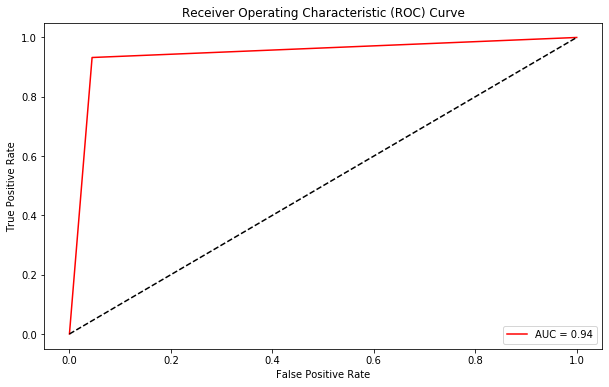

In [25]:
plot_ROC(y_test,y_pred)

# 2) Logistic Regression

In [26]:
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train,y_train)
y_pred = logisticRegression.predict(x_test)

In [27]:
accuracy_func(y_test,y_pred)

Accuracy = 78.42222222222223


In [28]:
conf_mat(y_test,y_pred)

Confusion Matrix is :
[[3153  252]
 [ 719  376]]


Area under the curve : 0.6346850924305514


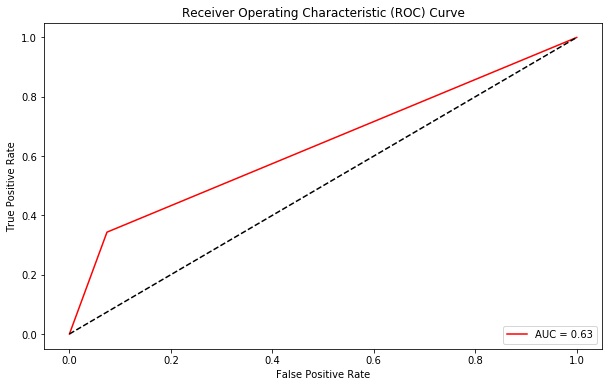

In [29]:
plot_ROC(y_test,y_pred)

# 3) Naïve Bayes

In [30]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
y_pred = gaussian.predict(x_test)

In [31]:
accuracy_func(y_test,y_pred)

Accuracy = 67.68888888888888


In [32]:
conf_mat(y_test,y_pred)

Confusion Matrix is :
[[2140 1265]
 [ 189  906]]


Area under the curve : 0.7279423893146661


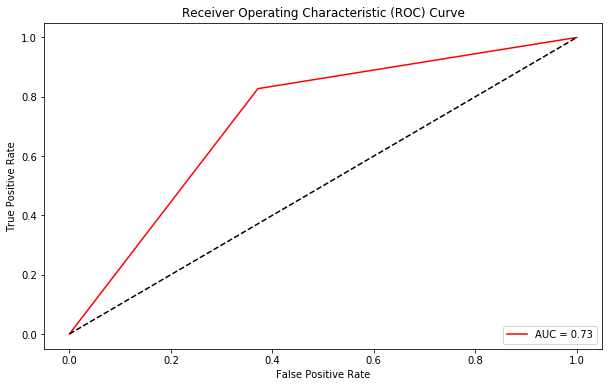

In [33]:
plot_ROC(y_test,y_pred)

# 4) Decision Tree

In [34]:
clf = DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=8,min_samples_leaf=4,max_depth=4)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [35]:
accuracy_func(y_test,y_pred)

Accuracy = 67.68888888888888


In [36]:
conf_mat(y_test,y_pred)

Confusion Matrix is :
[[2140 1265]
 [ 189  906]]


Area under the curve : 0.7279423893146661


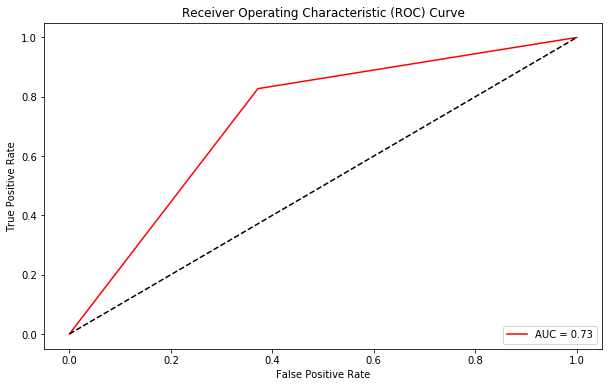

In [37]:
plot_ROC(y_test,y_pred)

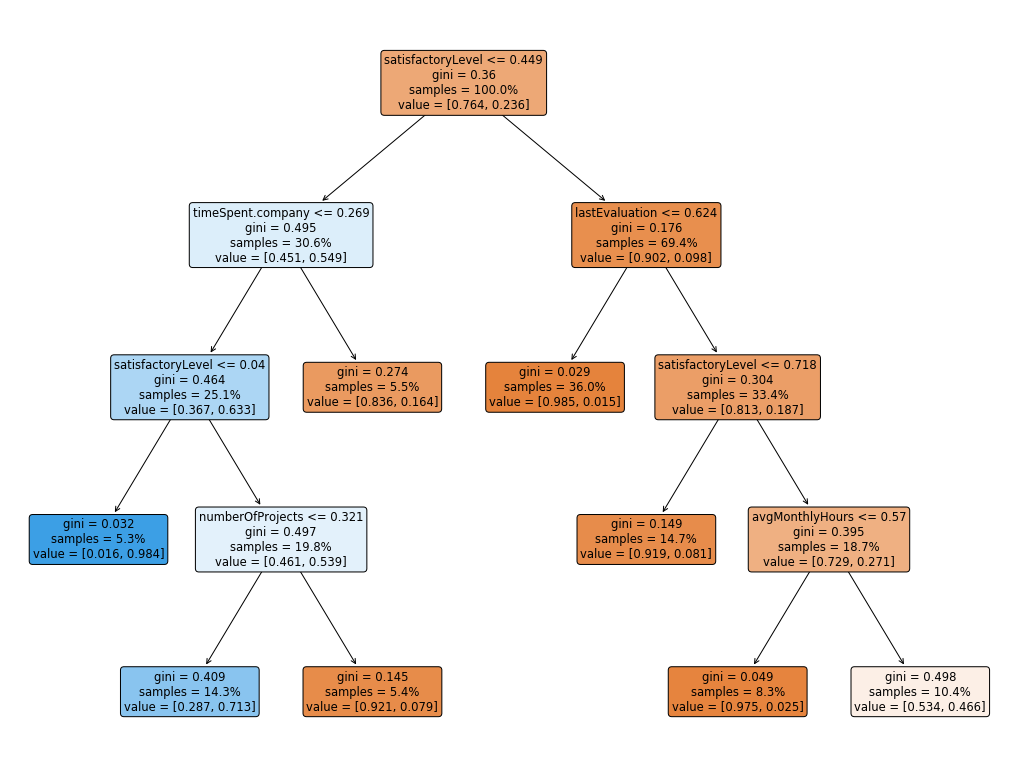

In [38]:
plt.figure(figsize=(18,14))
cols = list(X.columns.values)
tree.plot_tree(clf.fit(x_train,y_train),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

# 5) Random Forest


In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [40]:
accuracy_func(y_test,y_pred)

Accuracy = 99.11111111111111


In [41]:
conf_mat(y_test,y_pred)

Confusion Matrix is :
[[3397    8]
 [  32 1063]]


Area under the curve : 0.9842133848289181


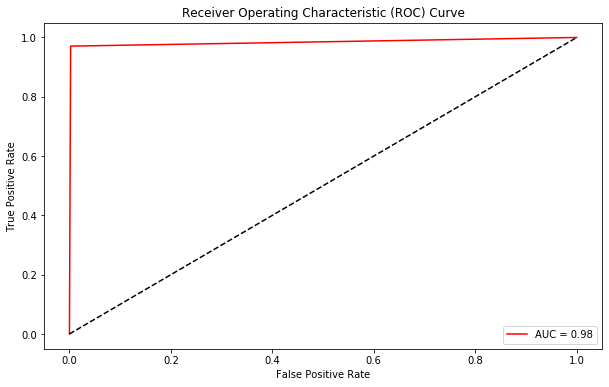

In [42]:
plot_ROC(y_test,y_pred)

# 6) Adaboost

In [43]:
ab = AdaBoostClassifier(n_estimators=100)
ab.fit(x_train,y_train)
y_pred = ab.predict(x_test)

In [44]:
accuracy_func(y_test,y_pred)

Accuracy = 95.88888888888889


In [45]:
conf_mat(y_test,y_pred)

Confusion Matrix is :
[[3311   94]
 [  91 1004]]


Area under the curve : 0.9446442580411563


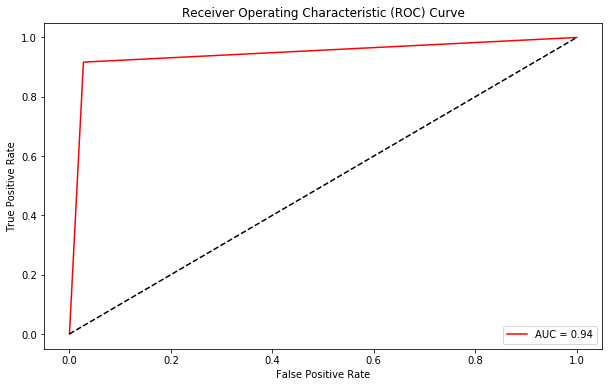

In [46]:
plot_ROC(y_test,y_pred)

# 7) Gradient Boosting

In [47]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [48]:
accuracy_func(y_test,y_pred)

Accuracy = 97.6888888888889


In [49]:
conf_mat(y_test,y_pred)

Confusion Matrix is :
[[3372   33]
 [  71 1024]]


Area under the curve : 0.9627340936978254


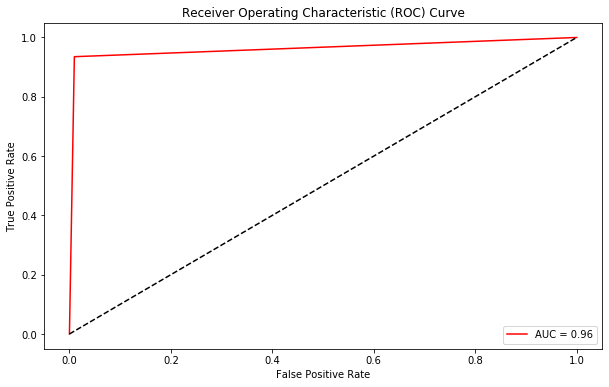

In [50]:
plot_ROC(y_test,y_pred)

# 8) XG Boost

In [51]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

In [52]:
accuracy_func(y_test,y_pred)

Accuracy = 97.4888888888889


In [53]:
conf_mat(y_test,y_pred)

Confusion Matrix is :
[[3370   35]
 [  78 1017]]


Area under the curve : 0.9592440609096212


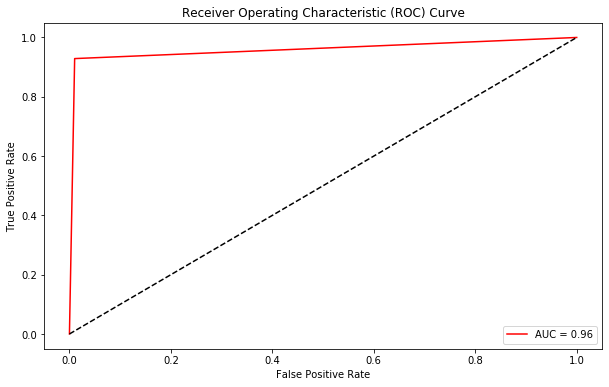

In [54]:
plot_ROC(y_test,y_pred)

# Which model gives best accuracy and why?

- Random Forest model gives the best accuracy (99%) with AUC 0.98 for this dataset.
- This is because Random Forest model handles "Unbalanced Data" and we can see that for this dataset the target variable ('left') is not balanced between its classes (0 and 1).
- Random forest improves on 'bagging'. It decorrelates the trees with the introduction of splitting on a random subset of features. This means that at each split of the tree, the model considers only a small subset of features rather than all of the features of the model. Hence it helps avoid overfitting and is robust to Outliers.

# Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s.

- No. 
    - In this dataset, the target variable ('left') is not balanced between its classes (0 and 1).
    - Accuracy is a good measure when the target variable classes in the dataset are nearly balanced. Therefore, accuracy is not a good performance evaluation metric for this data.
    - Accuracy per class does not take into account false positives. Hecne, it can gives us the false sense of achieving high accuracy.
- Here, Area Under the ROC curve (AUC-ROC) is a good performance evaluation metric. The curve is a plot of false positive rate (x-axis) versus the true positive rate (y-axis). An operator may plot the ROC curve and choose a threshold that gives a desirable balance between the false positives and false negatives.